In [1]:
import sys
sys.path.append('./libs')

import pandas as pd

from lib_ini import read_batch_csv

from lib_cleaner import twcleaner

from lib_current import read_currencies
from lib_current import currencies_prices

from lib_visual import visual_criptwit

"""
Data set:

https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021?select=2021.csv

Public domain dataset.
"""
df = read_batch_csv(2010, 2021, './data/')
currencies=read_currencies('./data/currencies_list_symbol_name.txt')

In [2]:
df_currencies=twcleaner(df,['tweet','date','created_at'],currencies)
df_currencies

./libs/lib_cleaner.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MATCHING'] = df2[lista_columnas[0]]
/home/emilio/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
./libs/lib_cleaner.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'bitcoin':                                                 TWEET                 DATE  \
 0   @ThisIsSandeepG Not true. A friend sent me par...  2017-11-28 02:08:12   
 1   @ThisIsSandeepG Not true. A friend sent me par...  2017-11-28 02:08:12   
 2   @Tom_Heats @coindesk Whoever owns the early BT...  2019-02-21 10:50:48   
 3   @coindesk That said, I still only own 0.25 BTC...  2019-02-21 10:44:32   
 4   @vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...  2018-10-22 23:51:15   
 5   @DeadlyBananas @MichaelAVaughn Not sure. I let...  2018-02-22 09:16:02   
 6   @ThisIsSandeepG Not true. A friend sent me par...  2017-11-28 02:08:12   
 7               Bitcoin is almost as bs as fiat money  2020-12-20 09:24:37   
 8                             Bitcoin is my safe word  2020-12-20 08:21:25   
 9   @Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶  2020-11-16 22:02:51   
 10  @jk_rowling Pretty much, although massive curr...  2020-05-15 22:03:01   
 11  @Bitcoin How much for some anime Bit

In [3]:
dict_df_prices=currencies_prices(df_currencies,'eur')


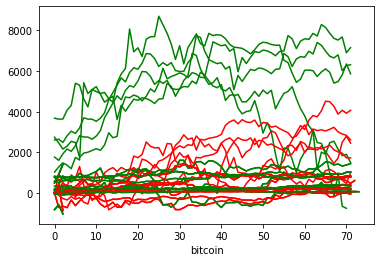

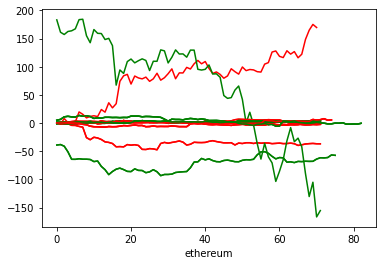

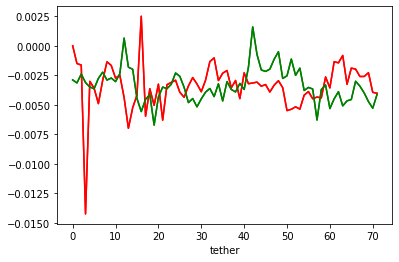

In [4]:
visual_criptwit(dict_df_prices,'./outputs')